In [ ]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [ ]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
!python3 "/content/gdrive/My Drive/maskdetector.py"
=

python3: can't open file '/content/gdrive/My Drive/lol.py': [Errno 2] No such file or directory


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
TRAINING_DIR = "/content/gdrive/MyDrive/dataset/Dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "/content/gdrive/MyDrive/dataset/Dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))


Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
132/132 [==============================] - ETA: 0s - loss: 0.5942 - acc: 0.7004WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model2-001.model/assets
132/132 [==============================] - 453s 3s/step - loss: 0.5942 - acc: 0.7004 - val_loss: 0.3241 - val_acc: 0.8866
Epoch 2/10
132/132 [==============================] - 146s 1s/step - loss: 0.3626 - acc: 0.8548 - val_loss: 0.1873 - val_acc: 0.9175
Epoch 3/10
132/132 [============================

In [ ]:
model.save('/content/drive/MyDrive/DipProject/modelmask')

NameError: ignored

In [ ]:
def tester(im):
  model = keras.models.load_model('/content/drive/MyDrive/DipProject/modelmask')
  results={0:'without mask',1:'mask'}
  GR_dict={0:(0,0,255),1:(0,255,0)}
  rect_size = 4
  o=1
  haarcascade = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascades/haarcascades/haarcascade_frontalface_default.xml')
  while (o==1):
    im = cv2.imread(im)
    #im=cv2.flip(im,1,1) 
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    print(im.shape)
    height,width = im.shape[:2] 
    faces = haarcascade.detectMultiScale(rerect_size)
    #gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #faces = haarcascade.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        print(result)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        print(x,y,w,h)
        cv2.rectangle(im,(width,height),(width+x,height+y),GR_dict[label],2)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
    cv2_imshow(im)
    o=2
    key = cv2.waitKey(10)
    if key == 27: 
        break
  cv2.destroyAllWindows()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(655, 1140, 3)
[[0.3344662  0.66553384]]
520 76 232 232


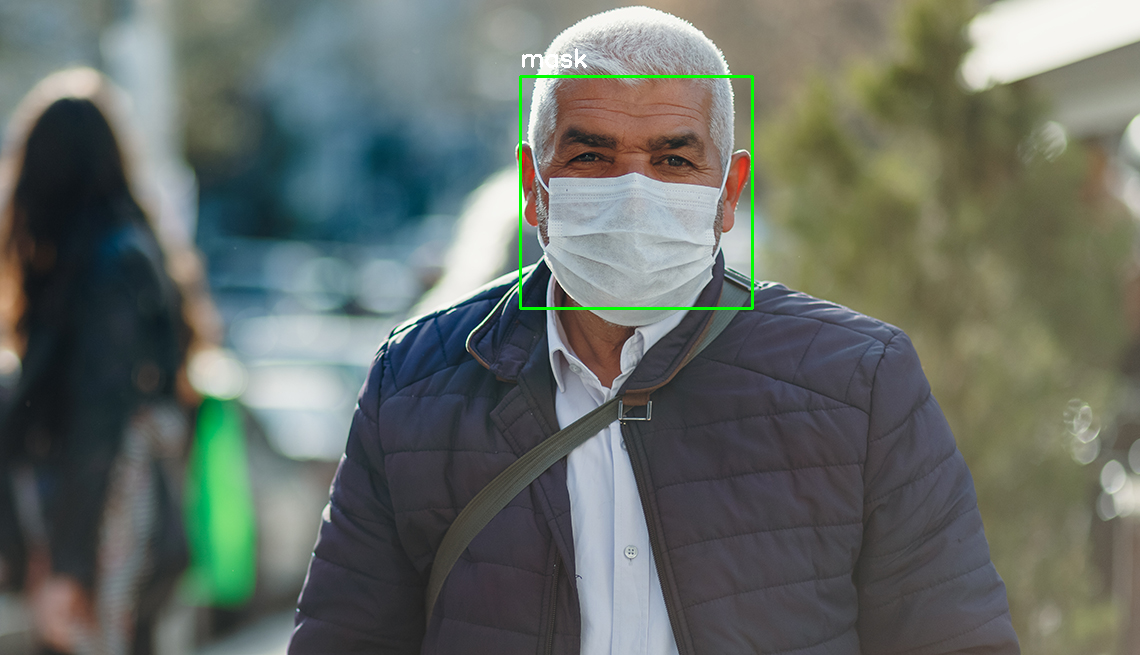

(645, 645, 3)
[[0.30538276 0.6946173 ]]
88 104 332 332


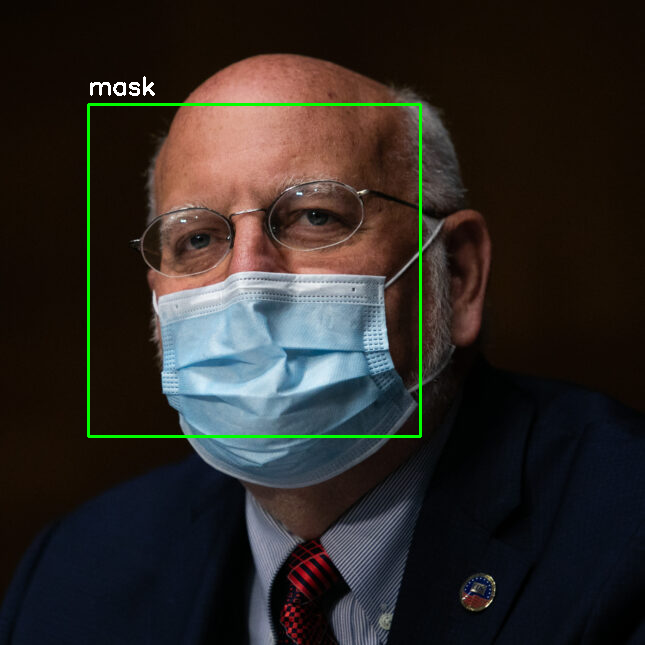

(822, 1232, 3)
[[0.9189364  0.08106362]]
320 132 300 300


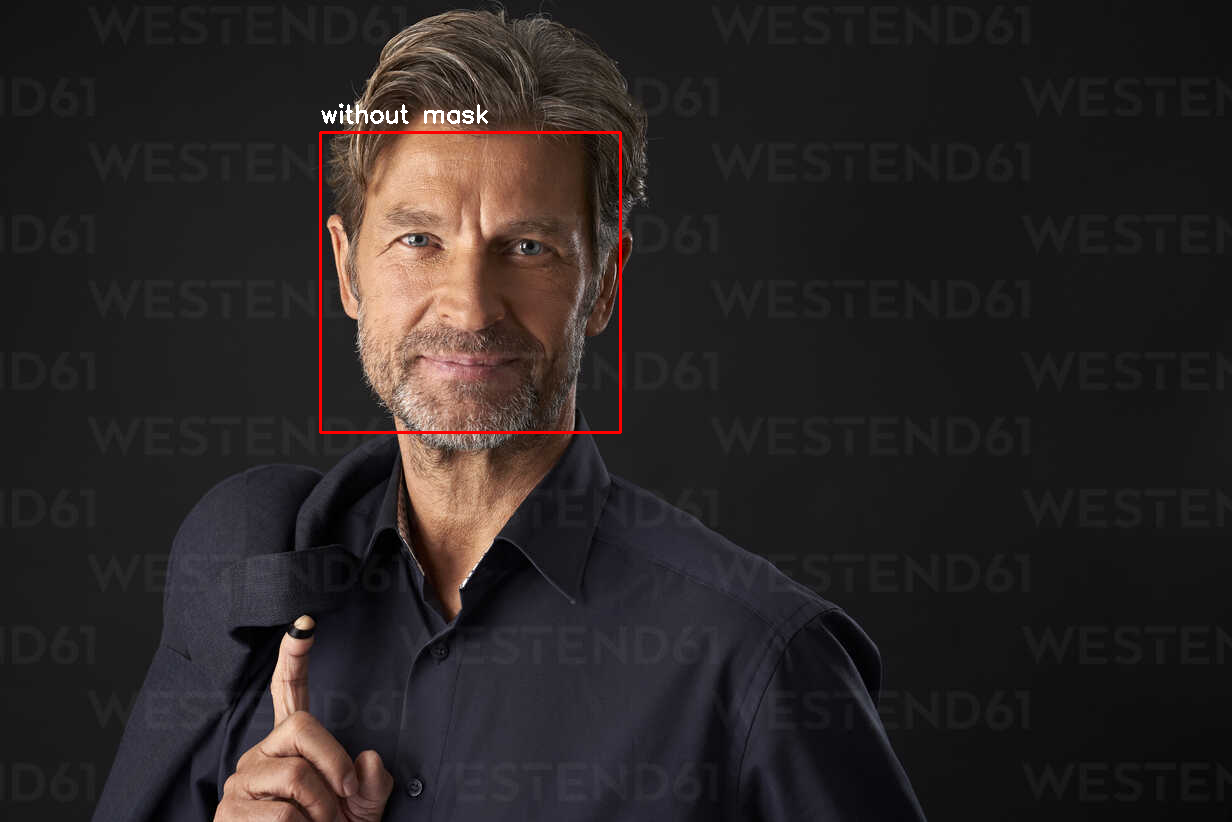

(426, 639, 3)
[[0.9347969  0.06520303]]
284 92 116 116


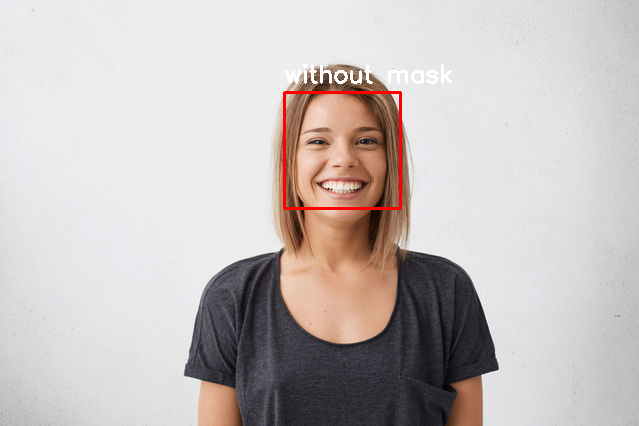

In [ ]:
tester('/content/drive/MyDrive/DipProject/testers/tester.jpg')
tester('/content/drive/MyDrive/DipProject/testers/tester2.jpg')
tester('/content/drive/MyDrive/DipProject/testers/tester6.jpg')
tester('/content/drive/MyDrive/DipProject/testers/tester12.jpg')